# Perceptron Study

### Import libraries

In [13]:
current_dir = os.path.abspath('')

src_dir = os.path.join(current_dir, '..', 'src')

sys.path.append(src_dir)

import sys
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from perceptron.perceptron import Perceptron

### Load Iris dataset

In [10]:
s = os.path.join('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data')

print('URL: ', s)

df = pd.read_csv(s, header=None, encoding='utf-8')

df.tail()

URL:  https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


,0,1,2,3,4
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


### Plot the setosa and versicolor classes

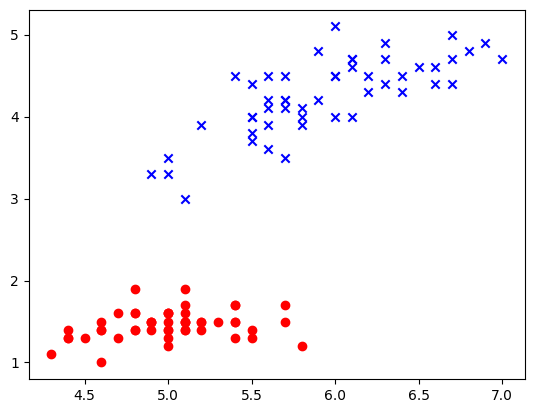

In [11]:
# Select setosa and versicolor
y = df.iloc[0:100, 4].values
y = np.where(y == 'Iris-setosa', -1, 1)

# Extract sepal length and petal length
X = df.iloc[0:100, [0, 2]].values

# Plot data
plt.scatter(X[:50, 0], X[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='blue', marker='x', label='versicolor')

### Plot perceptron training epochs and errors

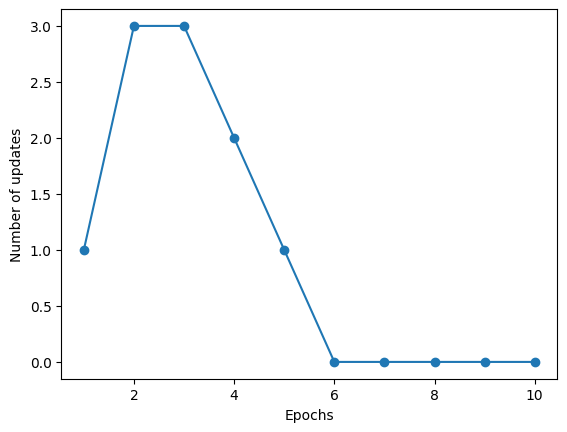

In [12]:
ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)
plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')
plt.show()

### Plot the decision boundry for the trained perceptron

/var/folders/fv/dqslr9qn1w79gjpdq1c2rgxw0000gn/T/ipykernel_38229/2354658514.py:20: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],


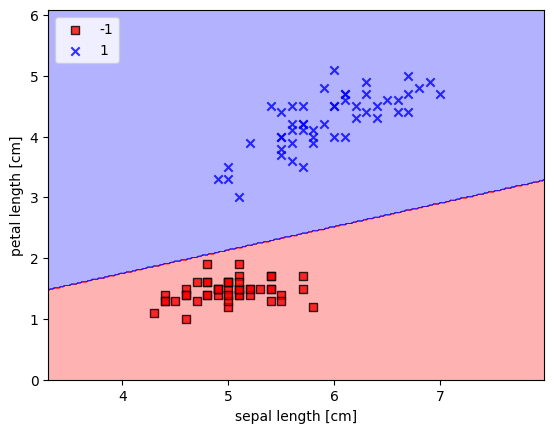

In [15]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Setup marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, c=[cmap(idx)],
                    marker=markers[idx], label=cl,
                    edgecolors='black')
        
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

# Learnings
When training on a dataset that has a clear division of a linear hyperplane, the perceptron can converge to a solution eventually. The one downside of the perceptron though, is if the dataset is not linearly separable, the perceptron will not converge to a solution and will train forever or until a given maximum epoch. This is why the perceptron is not used in practice, but it is a good starting point to understand the basics of neural networks.

More information about perceptron convergance can be found [here](https://sebastianraschka.com/pdf/lecture-notes/stat479ss19/L03_perceptron_slides.pdf).